# Homework 01. Linear vs PCR vs PLS models
Jorge Alejandro Díaz Sánchez
September 03rd, 2023

The dataset that will be used for this activity has the name “Abalone” and it can be found in the
repository “UC Irvine Machine Learning Repository” (https://archive.ics.uci.edu/dataset/1/abalone
). The dataset contains 4177 instances of 8 attributes to predict the age of Abalone. The age of
Abalone is determined by cutting the shell through the cone, staining it, and counting the number
of rings through a microscope -- a boring and time-consuming task. Other measurements, which are
easier to obtain, are used to predict the age. Further information, such as weather patterns and
location (hence food availability), may be required to solve the problem.

In [262]:
import sys
sys.path.append(r"~/Documents/GitHub/PredictiveModelling/")
import ax_utilities as utl
import pandas as pd
import numpy as np

## Data Loading

### Data Set attribute description
| Name           | Data Type  | Meas. | Description                 |
|:---------------|:-----------|:------|:----------------------------|
| Sex            | nominal    |       | M F and I (infant)          |
| Length         | continuous | mm    | Longest shell measurement   |
| Diameter       | continuous | mm    | perpendicular to length     |
| Height         | continuous | mm    | with meat in shell          |
| Whole weight   | continuous | grams | whole abalone               |
| Shucked weight | continuous | grams | weight of meat              |
| Viscera weight | continuous | grams | gut weight (after bleeding) |
| Shell weight   | continuous | grams | after being dried           |
| Rings          | integer    |       | +1.5 gives the age in years |


In [263]:
# Load Data
df = pd.read_csv("Data/abalone.data", header=None, names=["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shall_weight", "rings"])
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shall_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Data preparation

In [264]:
utl.data_quality_report(df)

,Names,Type,Missing_values,Present_values,Unique_values,Min value,Max_value
sex,sex,object,0,4177,3,NaN,NaN
length,length,float64,0,4177,134,0.0750,0.8150
diameter,diameter,float64,0,4177,111,0.0550,0.6500
height,height,float64,0,4177,51,0.0000,1.1300
whole_weight,whole_weight,float64,0,4177,2429,0.0020,2.8255
shucked_weight,shucked_weight,float64,0,4177,1515,0.0010,1.4880
viscera_weight,viscera_weight,float64,0,4177,880,0.0005,0.7600
shall_weight,shall_weight,float64,0,4177,926,0.0015,1.0050
rings,rings,int64,0,4177,28,1.0000,29.0000


In [265]:
inputs = df.drop("rings" ,axis= 1)
target = df["rings"]
numeric_inputs = inputs.drop("sex", axis=1)

In [266]:
numeric_inputs.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shall_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


### Outliers

<Axes: >

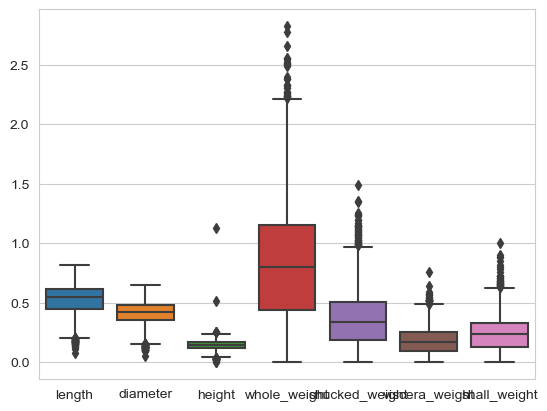

In [267]:
import seaborn as sns

sns.boxplot(numeric_inputs)

In [268]:
outliers_set = utl.get_all_outliers_indexes(numeric_inputs, print_percentages=True)

length ->  49  outliers represent:  1.17 %
diameter ->  59  outliers represent:  1.41 %
height ->  29  outliers represent:  0.69 %
whole_weight ->  30  outliers represent:  0.72 %
shucked_weight ->  48  outliers represent:  1.15 %
viscera_weight ->  26  outliers represent:  0.62 %
shall_weight ->  35  outliers represent:  0.84 %
TOTAL outliers represent:  3.66 %


In [269]:
numeric_inputs = numeric_inputs.drop(index=outliers_set)

In [270]:
target.drop(index=outliers_set, inplace=True)

<Axes: >

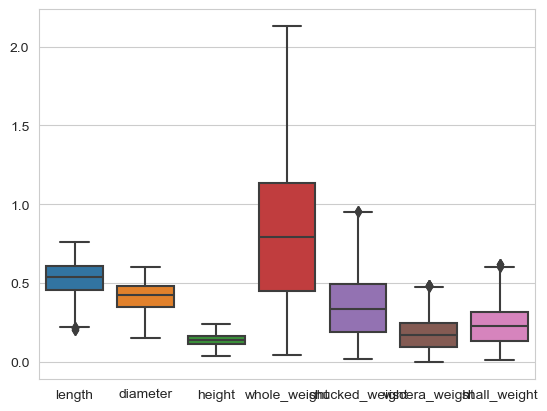

In [271]:
sns.boxplot(numeric_inputs)

In [272]:
numeric_inputs.shape

(4024, 7)

Due to the removal of the outliers, the mean and standard deviation for each variable is recalculated. The recalculation results in new data entries cataloged as outliers, but we will leave this in the data frame, since they seem to be close to the limits. We stay with approximately 96% of the original data.

### Skewness

We now check for the skewness for each variable:

In [273]:
numeric_inputs.skew()

length           -0.540556
diameter         -0.520150
height           -0.178285
whole_weight      0.305784
shucked_weight    0.427251
viscera_weight    0.423178
shall_weight      0.344314
dtype: float64

There is not any relevant skew problem in any variable. We will consider 

array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'whole_weight'}>,
        <Axes: title={'center': 'shucked_weight'}>,
        <Axes: title={'center': 'viscera_weight'}>],
       [<Axes: title={'center': 'shall_weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

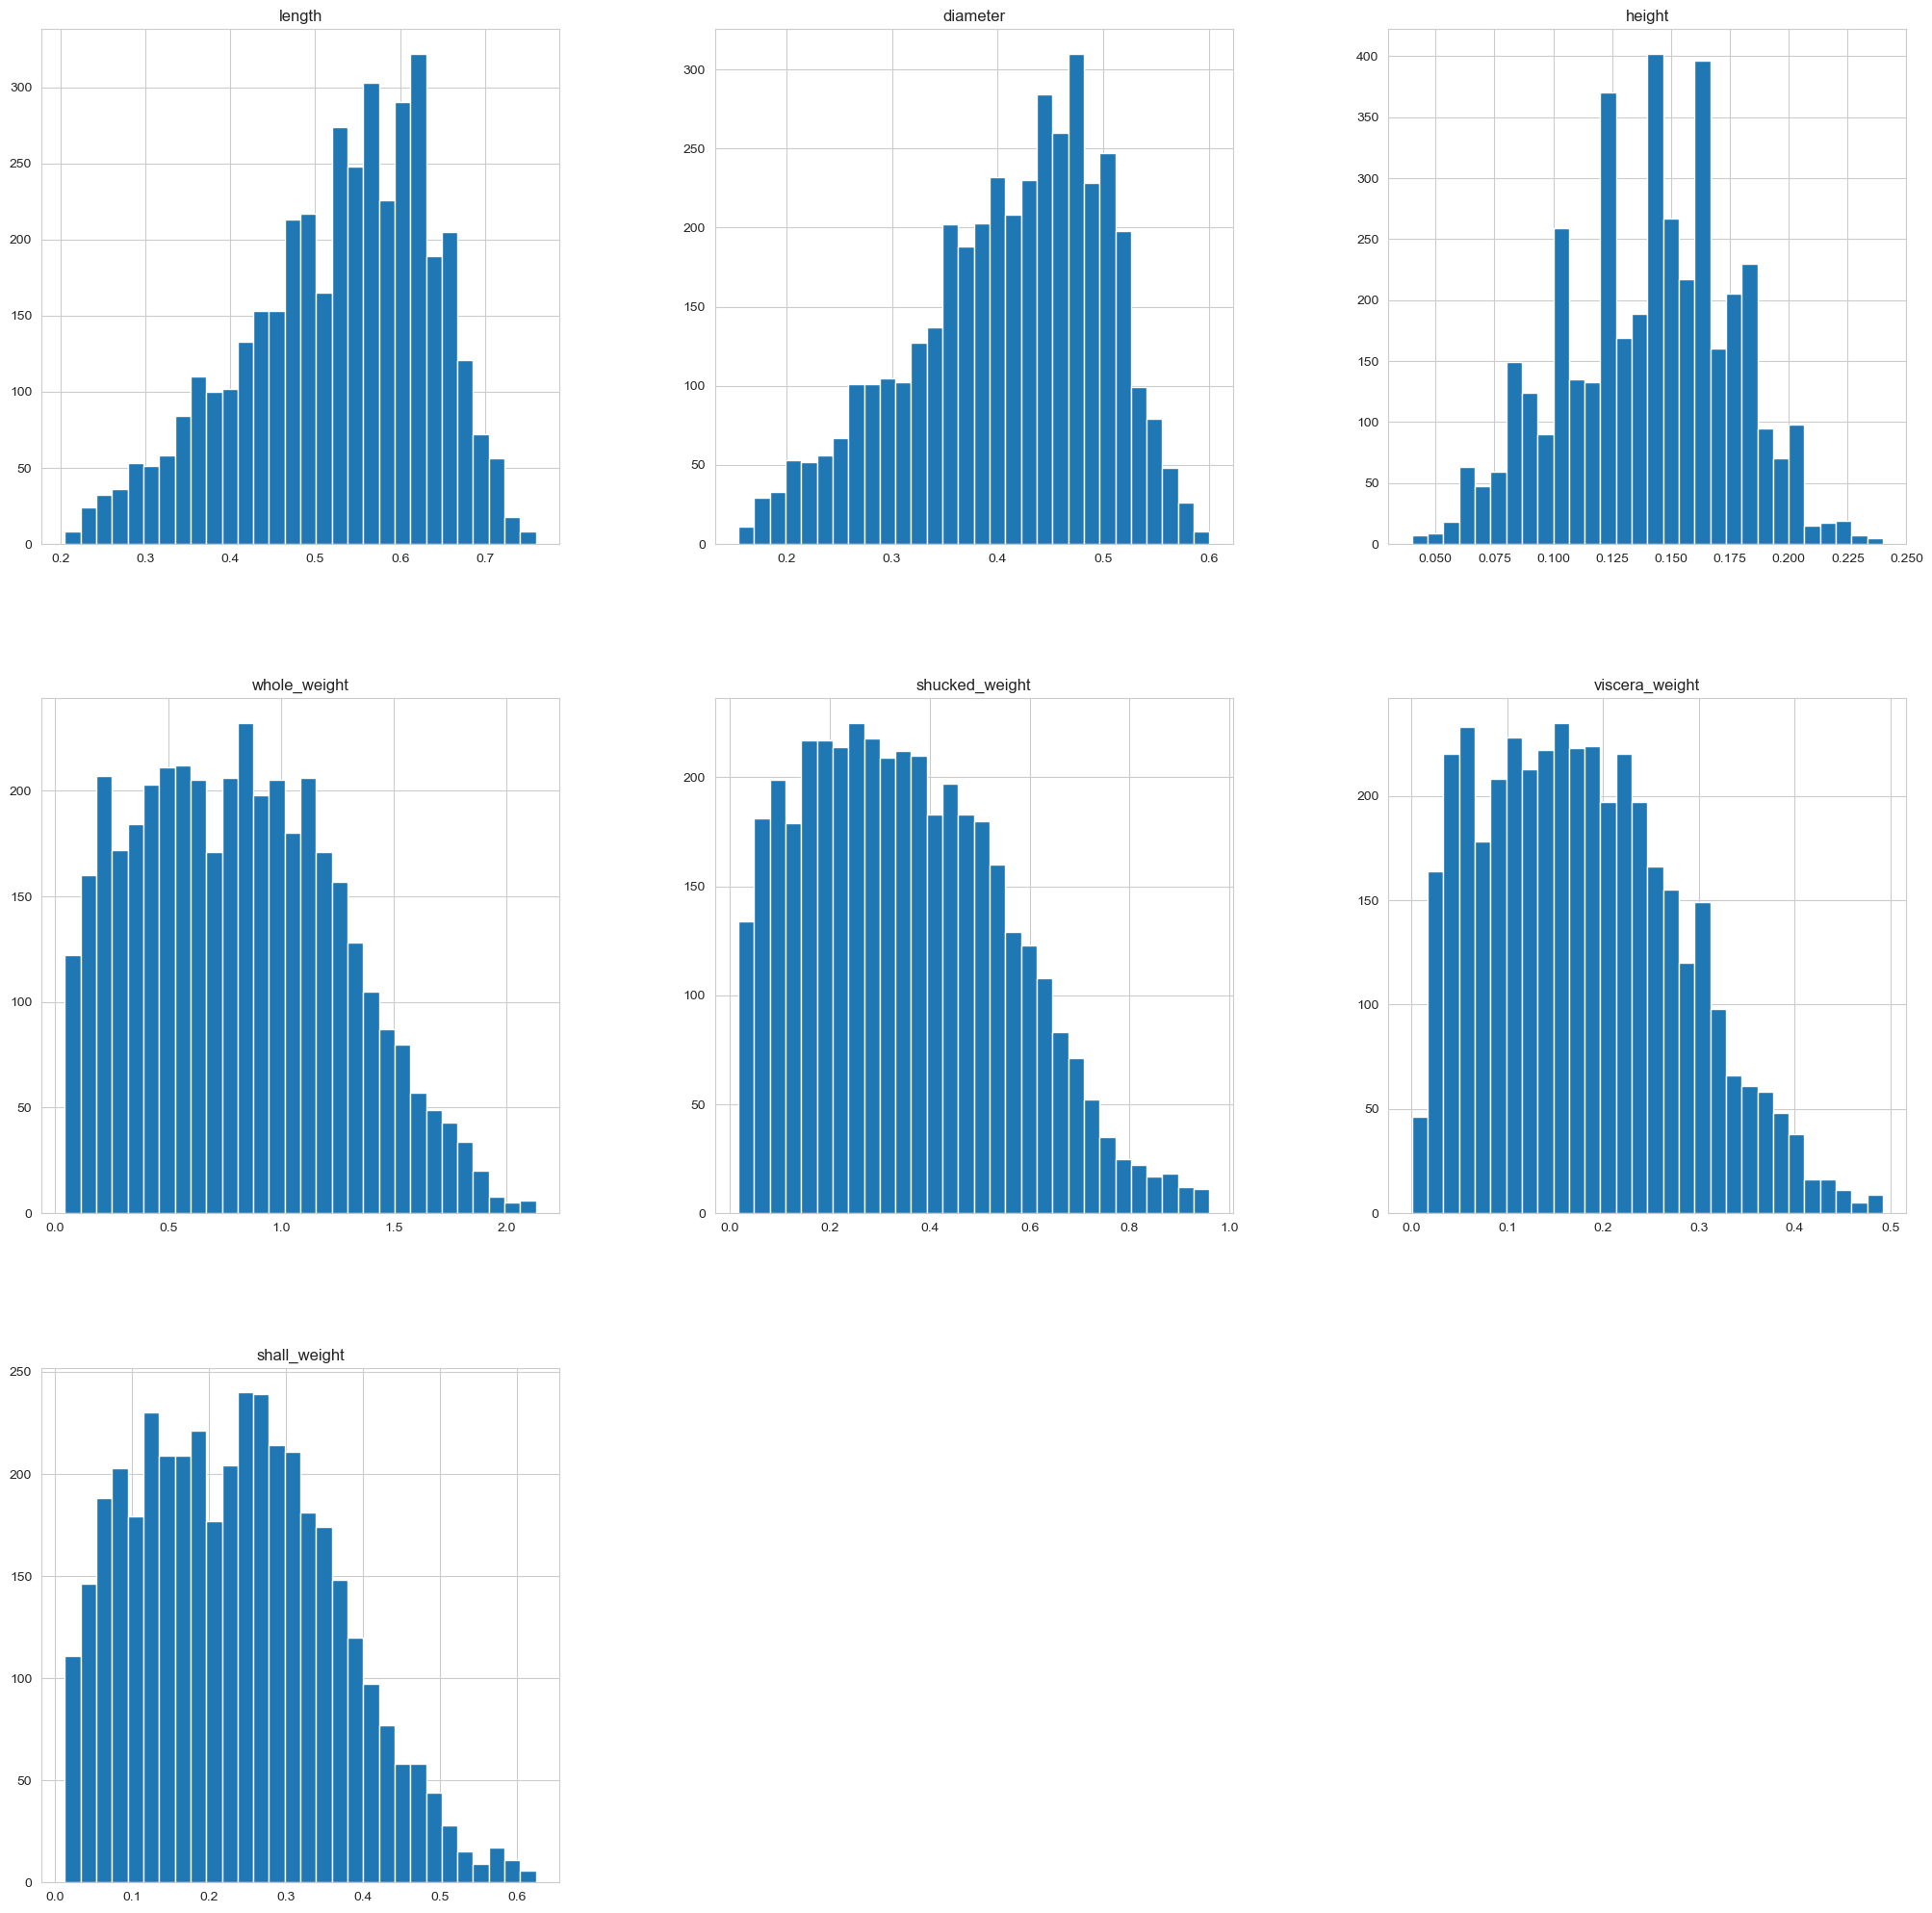

In [274]:
numeric_inputs.hist(bins=30, figsize=(25,25))

2. Create two subsets of data, where the first will be used for the training process and the
second for the testing process. (“split training and testing datasets”)

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numeric_inputs, target,
                                                   test_size=0.3, random_state=42)

## Regression Models

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,r2_score)

### Linear Regression with all data
Train a linear model to estimate the feature “Rings” using all other variables as inputs to the
model. Get the values of RMSE and R2 to evaluate the performance of the model in both
training and testing.

In [277]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [278]:
linear_reg.intercept_

3.020502079795129

In [279]:
linear_reg.coef_

array([ -0.69022305,   8.86799287,  22.25352747,   8.75533482,
       -20.56760815, -11.37371009,  11.53396874])

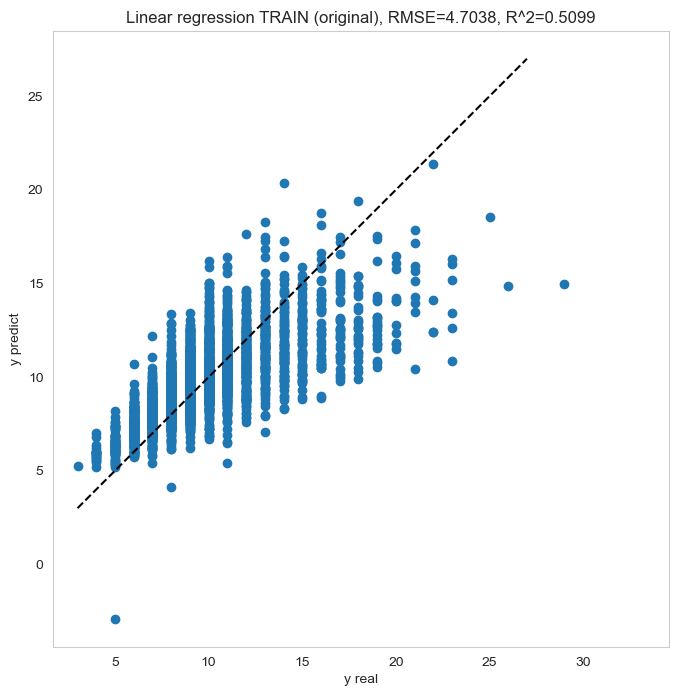

In [280]:
from matplotlib import pyplot as plt

y_predict = linear_reg.predict(X_train)

ref = np.linspace(min(y_test),max(y_test))

fig = plt.figure(figsize=(10,8))
plt.scatter(y_train,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('Linear regression TRAIN (original), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict)))
plt.grid()

In [281]:
'Linear regression TEST (original), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict))

'Linear regression TEST (original), RMSE=4.7038, R^2=0.5099'

In [282]:
y_predict = linear_reg.predict(X_train)
print("RMSE=%0.4f, R^2=%0.4f'"%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict)))

RMSE=4.7038, R^2=0.5099'


### Linear regression with correlation feature selection
Considering the same data set used in point 3; perform a feature selection using variance
or correlation criteria. With the variables resulting from the elimination process, train a new
linear model and calculate the metrics RMSE and 𝑅2 corresponding to training and testin

In [283]:
correlations = numeric_inputs.corr()
correlations

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shall_weight
length,1.000000,0.985572,0.890340,0.939734,0.913838,0.911613,0.914868
diameter,0.985572,1.000000,0.896929,0.938773,0.907438,0.906869,0.922238
height,0.890340,0.896929,1.000000,0.892057,0.838584,0.868008,0.897948
whole_weight,0.939734,0.938773,0.892057,1.000000,0.967967,0.964607,0.958228
shucked_weight,0.913838,0.907438,0.838584,0.967967,1.000000,0.926482,0.886376
viscera_weight,0.911613,0.906869,0.868008,0.964607,0.926482,1.000000,0.912466
shall_weight,0.914868,0.922238,0.897948,0.958228,0.886376,0.912466,1.000000


In [284]:
columns = set(numeric_inputs.columns)
keep_columns = set()
while len(columns) > 0:
    current = columns.pop()
    for variable in set(columns):
        not_correlated = True
        if current != variable and correlations[current][variable] > 0.95:
            print("{} and {} are correlated with: ".format(current, variable),correlations[current][variable])
            not_correlated = False
            if correlations[current].drop(labels=current).mean() > correlations[variable].drop(labels=current).mean():
                print("Keeping ", current)
                keep_columns.add(current)
                columns.remove(variable)
            else:
                print("Keeping ", variable)
                keep_columns.add(variable)
                current = variable
    if not_correlated:
        keep_columns.add(current)
print("keep", keep_columns)

shall_weight and whole_weight are correlated with:  0.958228269168492
Keeping  whole_weight
whole_weight and viscera_weight are correlated with:  0.9646073180803966
Keeping  whole_weight
shucked_weight and whole_weight are correlated with:  0.9679665810512821
Keeping  whole_weight
diameter and length are correlated with:  0.9855715390645374
Keeping  length
keep {'height', 'whole_weight', 'length'}


In [285]:
X_train_corr = X_train[list(keep_columns)]
X_test_corr = X_test[list(keep_columns)]
X_test_corr

,height,whole_weight,length
1792,0.175,1.0200,0.570
1260,0.120,0.4380,0.440
2837,0.135,0.9500,0.580
2019,0.135,0.6855,0.510
1282,0.135,0.6765,0.500
...,...,...,...
201,0.165,0.8250,0.500
1906,0.135,0.8245,0.575
3450,0.125,0.7115,0.525
3949,0.150,0.7155,0.525


In [286]:
linear_reg.fit(X_train_corr, y_train)

LinearRegression()

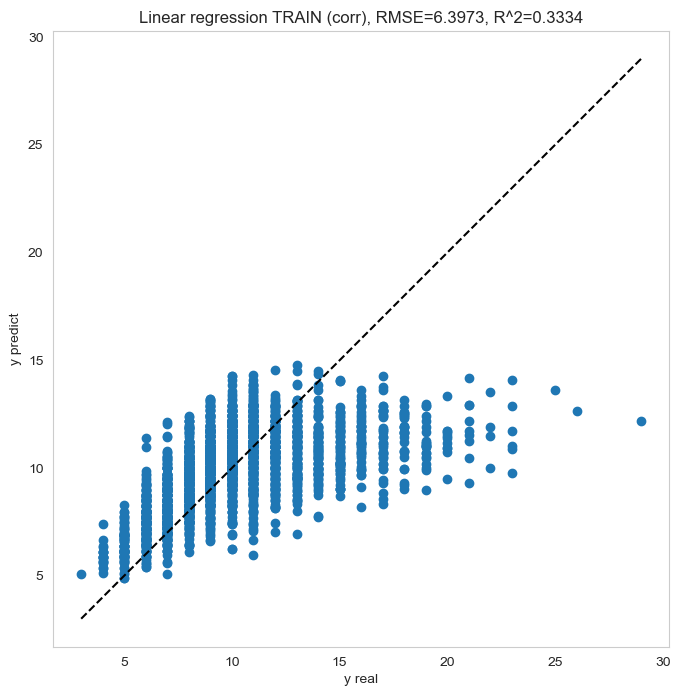

In [287]:
y_predict = linear_reg.predict(X_train_corr)
ref = np.linspace(min(y_train),max(y_train))

fig = plt.figure(figsize=(10,8))
plt.scatter(y_train,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('Linear regression TRAIN (corr), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict)))
plt.grid()

In [288]:
'Linear regression TRAIN (corr), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict))

'Linear regression TRAIN (corr), RMSE=6.3973, R^2=0.3334'

### Linear Regression with PCA

Again, consider the same data set used in point 3, perform a variable reduction by principal
component analysis (PCA). With the variables resulting from the reduction process, train a
new linear model and calculate the metrics RMSE and 𝑅2 corresponding to training and
testing.

In [289]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [290]:
pca.explained_variance_ratio_

array([9.76783388e-01, 1.04623202e-02, 7.20310162e-03, 3.02525842e-03,
       1.35068103e-03, 6.92035729e-04, 4.83215256e-04])

In [291]:
X_train_pca

,0,1,2,3,4,5,6
0,1.133800,0.016028,0.115489,-0.020397,-0.008971,-0.001786,0.008227
1,-0.400754,-0.015576,-0.054256,-0.003693,-0.005704,-0.006007,0.002156
2,0.604747,0.098377,0.107553,0.007650,0.022286,0.001146,0.005626
3,-0.784215,0.011549,0.047545,-0.001659,0.006046,-0.001551,-0.005770
4,0.339577,0.057266,-0.035695,-0.003445,-0.002876,-0.001610,-0.017565
...,...,...,...,...,...,...,...
2811,0.694223,0.040674,-0.007581,-0.010737,0.002962,0.021858,-0.014542
2812,0.187291,0.006905,-0.039973,0.019359,-0.052728,0.003808,-0.001184
2813,-0.891481,0.045684,0.105162,0.001337,0.004832,-0.012197,-0.003273
2814,-0.435916,-0.006484,-0.024836,-0.005982,-0.010261,-0.019025,0.021586


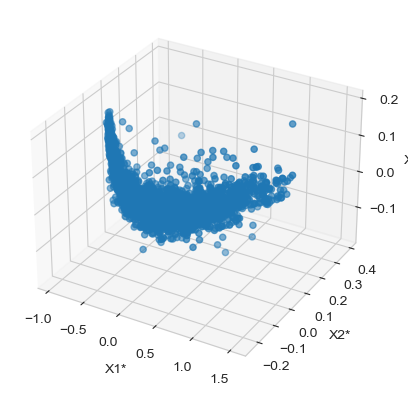

In [292]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca.iloc[:,0], X_train_pca.iloc[:,1], X_train_pca.iloc[:,2])
ax.set_xlabel('X1*')
ax.set_ylabel('X2*')
ax.set_zlabel('X3*')
plt.show()
# fig.savefig('../figures/P2_fig/F3.png')
# 
# fig = sns.pairplot(X_train_pca,x_vars=[0,1,2],
#                    y_vars=target)

In [293]:
linear_reg.fit(X_train_pca, y_train)

LinearRegression()

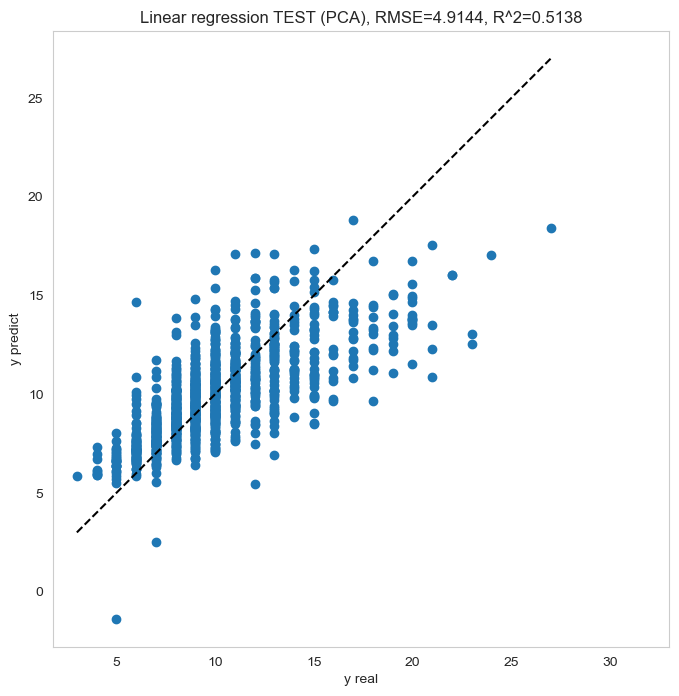

In [294]:
y_predict = linear_reg.predict(X_test_pca)
ref = np.linspace(min(y_test),max(y_test))

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('Linear regression TEST (PCA), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_test,y_predict ),r2_score(y_test,y_predict)))
plt.grid()

In [295]:
X_train_pca_selected = np.array(X_train_pca.iloc[:,0]).reshape(-1,1)
X_test_pca_selected = np.array(X_test_pca.iloc[:,0]).reshape(-1,1)
linear_reg.fit(X_train_pca_selected, y_train)

LinearRegression()

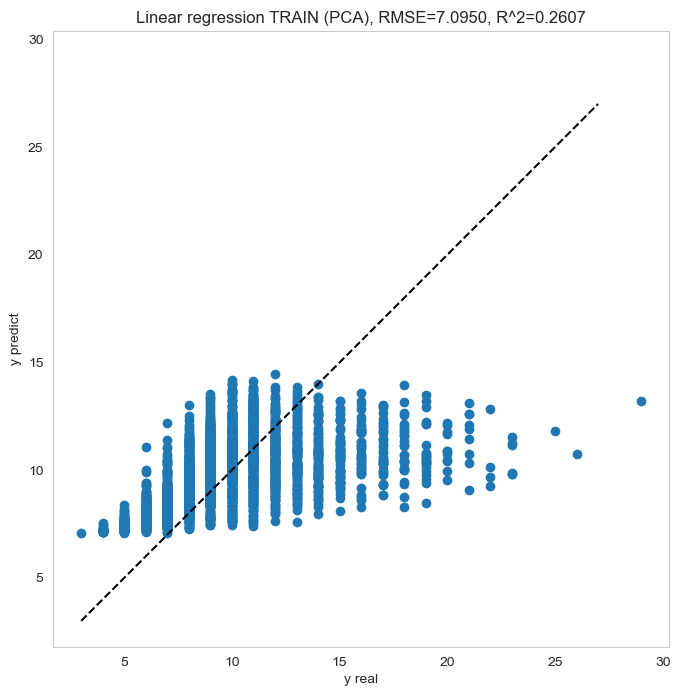

In [296]:
y_predict = linear_reg.predict(X_train_pca_selected)
ref = np.linspace(min(y_test),max(y_test))

fig = plt.figure(figsize=(10,8))
plt.scatter(y_train,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('Linear regression TRAIN (PCA), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict)))
plt.grid()

In [297]:
'Linear regression TRAIN (PCA), RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_train,y_predict ),r2_score(y_train,y_predict))

'Linear regression TRAIN (PCA), RMSE=7.0950, R^2=0.2607'

### Linear Regression with PLS

Considering the same data set used in point 3 again, train a new linear model using PLS
technique and calculate the metrics RMSE and 𝑅2 corresponding to training and testing.

In [298]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=len(X_test.columns))
pls.fit(X_train, y_train)
X_train_pls = pd.DataFrame(pls.transform(X_train))
# X_test_pls = pd.DataFrame(pls.transform(X_test))

In [299]:

y_predict = pls.predict(X_test)

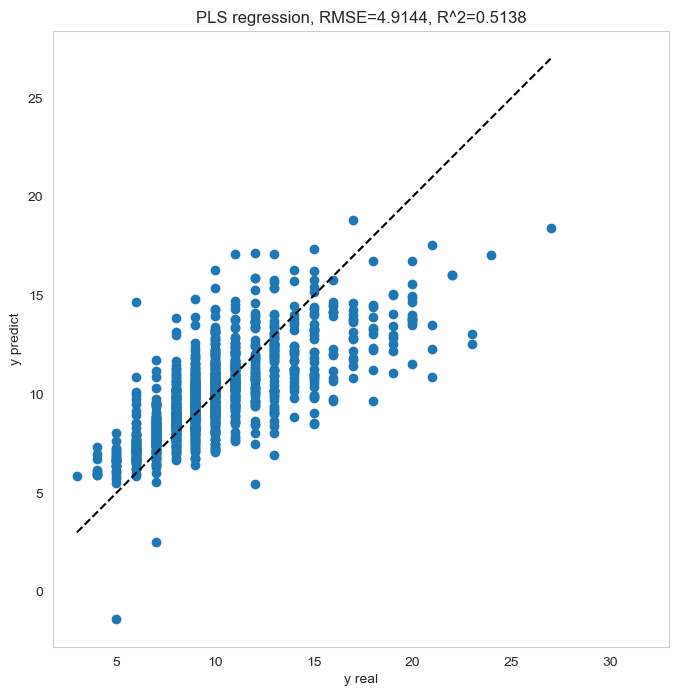

In [300]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('PLS regression, RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_test,y_predict),r2_score(y_test,y_predict)))
plt.grid()

In [301]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(3)
pls.fit(X_train, y_train)

PLSRegression(n_components=3)

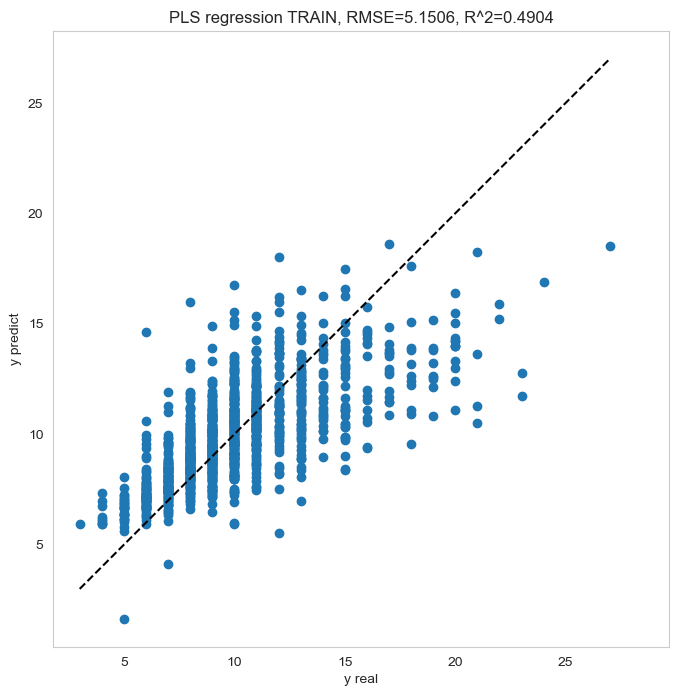

In [302]:
y_predict = pls.predict(X_test)
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('PLS regression TRAIN, RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_test,y_predict),r2_score(y_test,y_predict)))
plt.grid()

In [303]:
'PLS regression TEST, RMSE=%0.4f, R^2=%0.4f'%(mean_squared_error(y_test,y_predict),r2_score(y_test,y_predict))

'PLS regression TEST, RMSE=5.1506, R^2=0.4904'

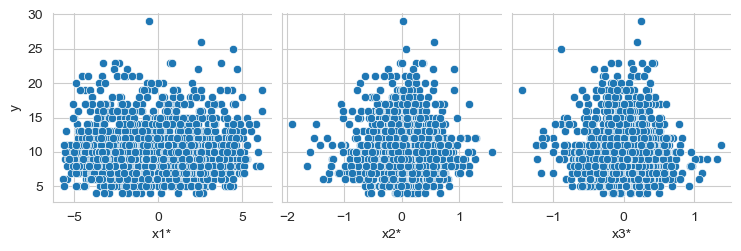

In [304]:
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)
data_pls = pls.transform(X_train)
data_pls = pd.DataFrame(data_pls,columns=['x1*','x2*','x3*'])
data_pls['y'] = y_train

fig = sns.pairplot(data_pls,x_vars=['x1*','x2*','x3*'],
                   y_vars=['y'])